## Brenna Manning
## Data Science Warm Up Project: Model Iteration 2
-------------------------------------------------


### Sources I've drawn inspiration from

The model that got me the highest score so far was from the DataQuest "Improve your Submission" Mission, so I will take a lot of inspiration from that, and make use of random forests. I have also reasearched other methods and will draw inspiration from various sources, as shown below.

- DataQuest "Improve Your Submission" Mission.
- Boosting and Random Forest for Visual Recognition http://www.iis.ee.ic.ac.uk/~tkkim/iccv09_tutorial
- A Data Science Exploration for the Titanic in R http://www.philippeadjiman.com/blog/2013/09/12/a-data-science-exploration-from-the-titanic-in-r/
- This piazza question and response https://piazza.com/class/iju1ffuooio7mp?cid=14
- This jupyter notebook tutorial I found on a Kaggle message board http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
- http://vishnuviswanath.com/kaggle-titanic.html
- More info on random forest http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Some more data exploration techniques https://www.wakari.io/sharing/bundle/travis/Titanic?has_login=False


### Additional ideas of my own that I am incorporating


 In my model_iteration_1, I tried adding additional features as variables. This _lowered_ the score I got each time. Because of this, I believe using fewer features that have a higher impact, such as sex, age, and class, will get me better results.
 
EDIT: I have decided to also include the name feature to extract the title, because I saw from the DataQuest Mission how strongly title correlated with survival.

I am also going to use the age feature primarily focusing on the intersection of the age and sex features. Through in class explorations of the data, the people at my table saw a difference in how sex effected how much survival depended on age. 

EDIT: Adding an AgexSex feature lowered my score, so I removed it, but then decided to replace the Age Feature with it, which did not appear to change my score, but I believe could be more effective.

### Relevant graphs or visualizations

In [772]:
import pandas as pd
titanic_df = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

In [773]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [774]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
# for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import thinkplot



#### Visualizations - Relationship of Fare and Survival

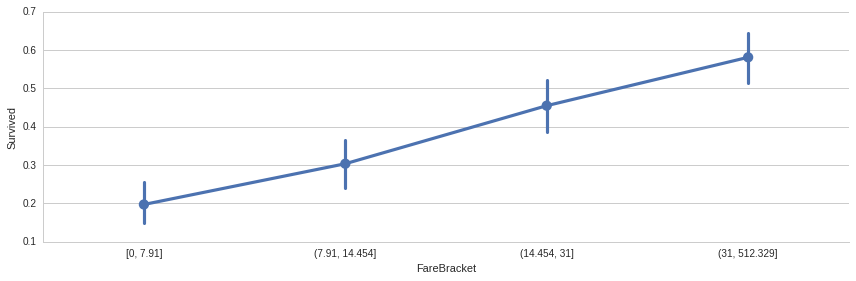

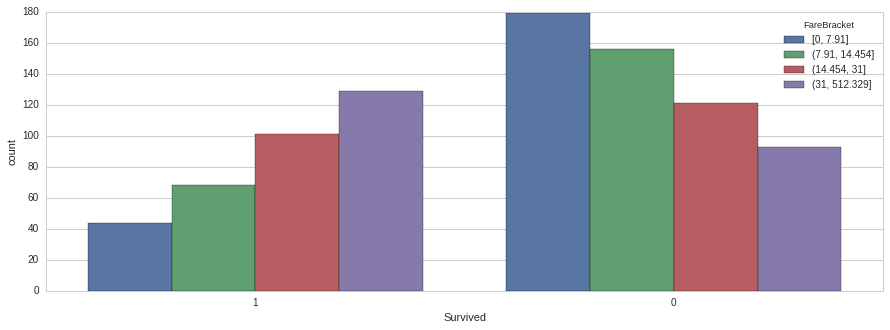

In [775]:


titanic_df.dropna()

titanic_df.Fare = titanic_df.Fare.astype(float)

titanic_df['FareBracket'] = pd.qcut(titanic_df.Fare, 4)

sns.factorplot('FareBracket','Survived', data=titanic_df,size=4,aspect=3)

#print titanic_df['FareBracket']

fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="FareBracket", data=titanic_df, order=[1,0], ax=axis1,)



#### Visualizations - Relationship of Fare and Survival

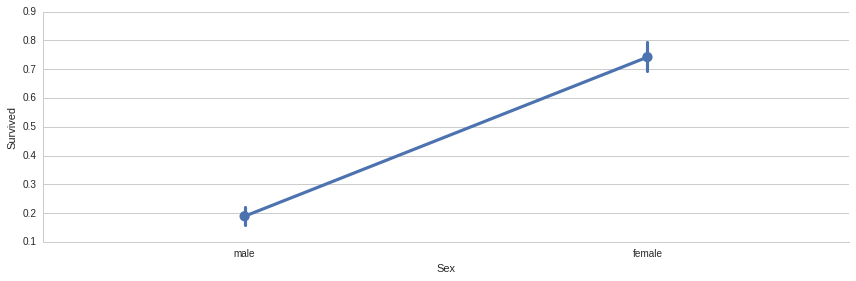

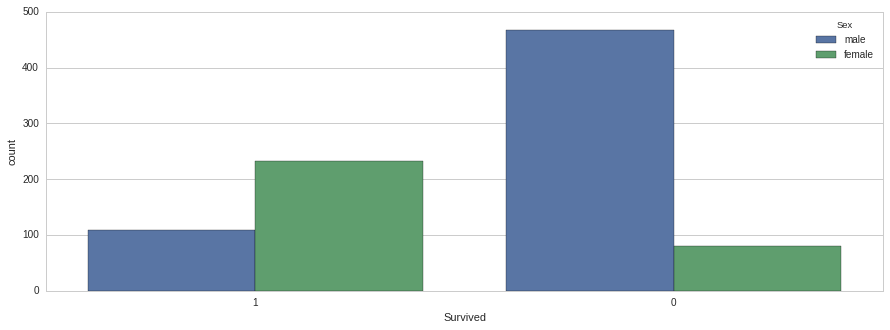

In [776]:
sns.factorplot('Sex','Survived', data=titanic_df,size=4,aspect=3)
fig, (axis1) = plt.subplots(figsize=(15,5))
sns.countplot(x='Survived', hue="Sex", data=titanic_df, order=[1,0], ax=axis1)

### Visualizations - Relationship of Class and Survival

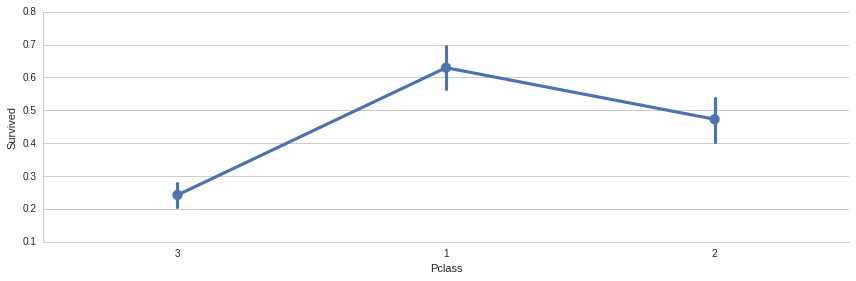

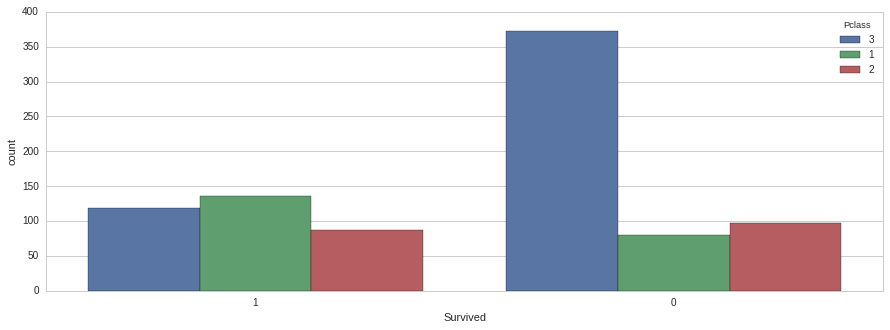

In [777]:

sns.factorplot('Pclass','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="Pclass", data=titanic_df, order=[1,0], ax=axis1,)


### Visualizations - Relationship between Age and Survival

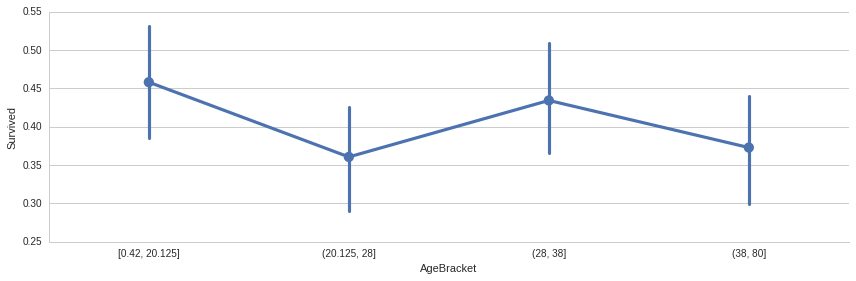

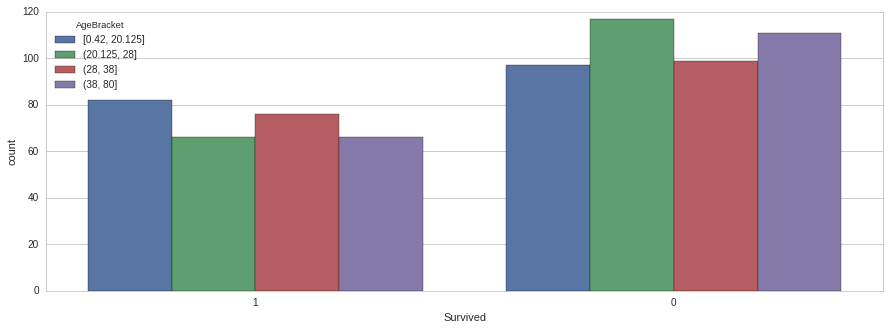

In [778]:
titanic_df.Age = titanic_df.Age.astype(float)

titanic_df['AgeBracket'] = pd.qcut(titanic_df.Age, 4)

sns.factorplot('AgeBracket','Survived', data=titanic_df,size=4,aspect=3)


fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="AgeBracket", data=titanic_df, order=[1,0], ax=axis1,)



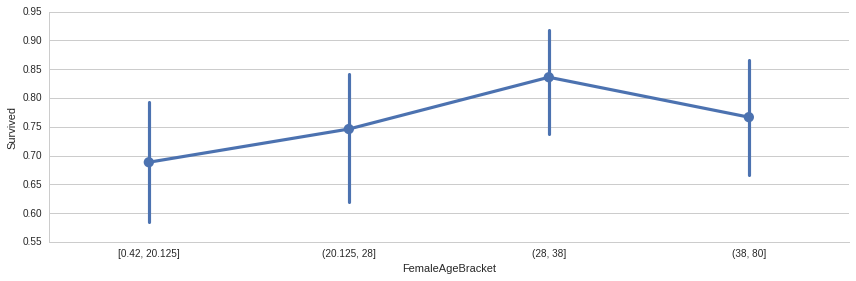

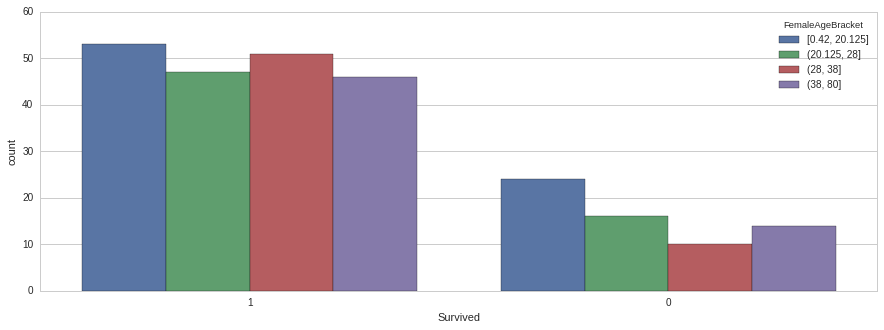

In [779]:
##Split up by gender

#FEMALE AGE

titanic_df['FemaleAgeBracket'] = titanic_df['AgeBracket'][titanic_df.Sex == "female"]

sns.factorplot('FemaleAgeBracket','Survived', data=titanic_df,size=4,aspect=3)


fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="FemaleAgeBracket", data=titanic_df, order=[1,0], ax=axis1,)



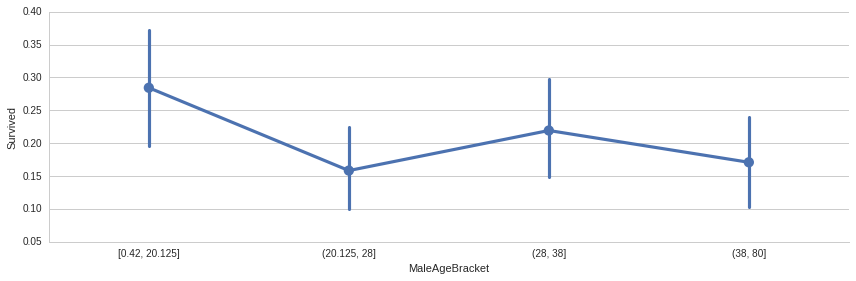

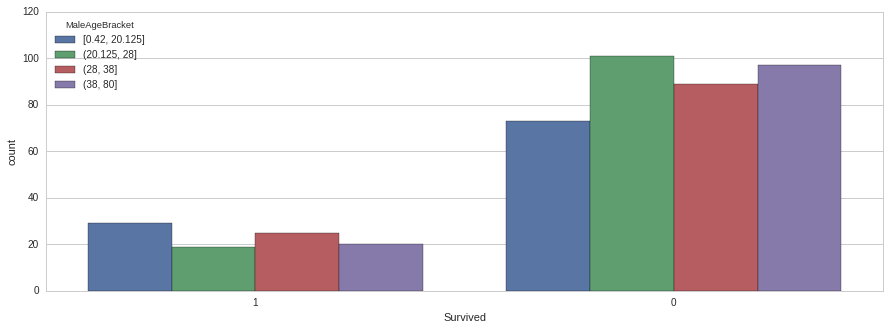

In [780]:
##MALE Age vs Survival

titanic_df['MaleAgeBracket'] = titanic_df['AgeBracket'][titanic_df.Sex == "male"]

sns.factorplot('MaleAgeBracket','Survived', data=titanic_df,size=4,aspect=3)


fig, (axis1) = plt.subplots(figsize=(15,5))
    
sns.countplot(x='Survived', hue="MaleAgeBracket", data=titanic_df, order=[1,0], ax=axis1,)



### Visualization - Class and Gender  and Survival

High class females much more likely to live
Low class males much more likely to die

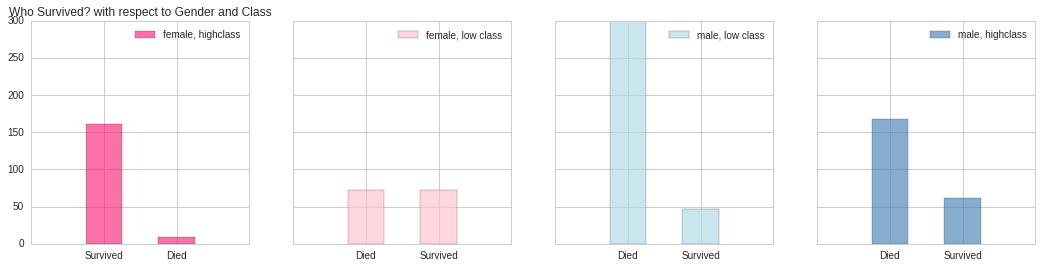

In [781]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65
#NOTE: This has been copied from a tutorial
#https://www.wakari.io/sharing/bundle/travis/Titanic?has_login=False 
#Also Cited Above

ax1=fig.add_subplot(141)
female_highclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = titanic_df.Survived[titanic_df.Sex == 'female'][titanic_df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = titanic_df.Survived[titanic_df.Sex == 'male'][titanic_df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')



# Model implementation

In my model, I will only be considering the features of Sex, Age, Class, and Fare, since in previous iterations adding more variables seemed to hurt my accuracy. Of the features I am ignoring, I think the ones that have the most potential to be useful are SibS, Parch, and potentially Name (, but I will be leaving them out for now.

In [782]:
#titanic_df = titanic_df.drop(['Ticket','Cabin','Embarked', 'Parch', 'SibSp'], axis=1) 
titanic_df = titanic_df.drop(['Ticket','Cabin'], axis=1)  
#undropping SibSp and Parch becasue using them in 3rd attempt
#undropping Embarked because using in 5th attempet
titanic_df.dropna()

titanic_test = titanic_test.drop(['Ticket','Cabin'], axis=1)
titanic_test.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


In [783]:
#Imports!

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import math

# First Attempt

In [784]:
#Saw how effective the title feature was in the DataQuest Mission, so I am using it in my implementation.
#The function below I am using for get_title is the same as the one in the mission
#But I have added/modified most of the comments to demonstrate my understanding of how it works

import re
#re for regular expressions
def get_title(name):
    # Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:#if a title was found
        return title_search.group(1)
    return "" #If there is no title in the name, return an empty string
#Get the titles from each Name and save to variable titles
titles = titanic_df["Name"].apply(get_title)
# Map each title to an integer.  Uncommon titles are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
#I used the same mappings as in the DataQuest Mission.
for k,v in title_mapping.items():
    titles[titles == k] = v
# Verify that we converted everything.
print(pd.value_counts(titles))
#Add the titles to titanic_df as a new feature of the df
titanic_df["Title"] = titles

1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


In [785]:

titanic_df.loc[titanic_df["Sex"] == "male", "Sex"] = 0
titanic_df.loc[titanic_df["Sex"] == "female", "Sex"] = 1
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1


titanic_df["Age"] = titanic_df["Age"].astype(float)
titanic_test["Age"] = titanic_df["Age"].astype(float)

titanic_df["Pclass"] = titanic_df["Pclass"].astype(float)
titanic_test["Pclass"] = titanic_df["Pclass"].astype(float)

titanic_df["Fare"] = titanic_df["Fare"].astype(float)
titanic_test["Fare"] = titanic_df["Fare"].astype(float)

titanic_df["Title"] = titanic_df["Title"].astype(float)
titanic_test["Title"] = titanic_df["Title"].astype(float)

titanic_df["Sex"] = titanic_df["Sex"].fillna(titanic_df["Sex"].median())
titanic_test["Sex"] = titanic_test["Sex"].fillna(titanic_df["Sex"].median())

titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())
titanic_test["Age"] = titanic_test["Age"].fillna(titanic_test["Age"].median())

titanic_df["Pclass"] = titanic_df["Pclass"].fillna(titanic_df["Pclass"].median())
titanic_test["Pclass"] = titanic_test["Pclass"].fillna(titanic_test["Pclass"].median())

titanic_df["Fare"] = titanic_df["Fare"].fillna(titanic_df["Fare"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())


titanic_df["Title"] = titanic_df["Title"].fillna(titanic_df["Title"].mean())
titanic_test["Title"] = titanic_test["Title"].fillna(titanic_test["Title"].mean())


titanic_df["AgexSex"] = titanic_df["Age"]*titanic_df["Sex"]
titanic_test["AgexSex"] = titanic_test["Age"]*titanic_test["Sex"]

titanic_df["FemaleHighClass"] = titanic_df["Sex"]
titanic_df.loc[titanic_df["Pclass"] == 3, "FemaleHighClass"] = 0


titanic_test["FemaleHighClass"] = titanic_test["Sex"]
titanic_test.loc[titanic_test["Pclass"] == 3, "FemaleHighClass"] = 0


titanic_df["MaleLowClass"] = titanic_df["Sex"]
titanic_df.loc[titanic_df["Pclass"] == 3, "MaleLowClass"] = 1
titanic_df.loc[titanic_df["Sex"] == 1, "MaleLowClass"] = 0


titanic_test["MaleLowClass"] = titanic_test["Sex"]
titanic_test.loc[titanic_test["Pclass"] == 3, "MaleLowClass"] = 1
titanic_test.loc[titanic_test["Sex"] == 1, "MaleLowClass"] = 0

#The Sex of the passenger mattered far more to survival in the high classes than in class 3.
#The majority of high class women survived.

In [786]:


#titanic_df["FareBracket"] = pd.cut(titanic_df.Fare, 4, labels=["0", "1", "2", "3"])
#titanic_df["FareBracket"] = titanic_df["FareBracket"].astype(float)
#titanic_test["FareBracket"] = pd.cut(titanic_test.Fare, 4, labels=["0", "1", "2", "3"])
#titanic_test["FareBracket"] = titanic_test["FareBracket"].astype(float)


#predictors = ["Pclass", "Sex", "Age", "FareBracket"]
#tested breaking up fare into 4 brackets. 
#This decreased the score, so I switched back to using the original "Fare" feature.
predictors = ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]
#I had tried adding a AgexSex feature to account for that Age has a different effect on survival depending on sex. 
#This feature also lowered my score.

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]],
    [LogisticRegression(random_state=1), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]]
]



alg = RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2)
#tested n_estimators random_state min_samples_split & min_samples_leaf - these were optimal values

#alg = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
#RandomForestClassifier did better than Gradient Boosting Classifier

scores1 = cross_validation.cross_val_score(alg, titanic_df[predictors], titanic_df["Survived"], cv=3)
#tested different cv outcomes and 3 tended to get the highest score

print(scores1.mean())




0.835016835017


In [787]:
alg.fit(titanic_df[predictors], titanic_df["Survived"])
predictions = alg.predict(titanic_test[predictors])
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("kaggle_model_it2.csv", index=False)

In [788]:


submission.to_csv("kaggle_model_it2.csv", index=False)

#### This submission did very poorly, scoring 0.60766 on the leaderboard.
I think I was trying to get the score to go up when that wasn't the best way to test it.

Trying again with different algorithm.

## Second Attempt

In [789]:

predictors = ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]],
    [LogisticRegression(random_state=1), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]]
]

full_predictions = []
for alg, predictors in algorithms:
    alg.fit(titanic_df[predictors], titanic_df["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4


predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
full_predictions.append(predictions)


submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })


submission.to_csv("kaggle_model_it_2_2.csv", index=False)





### This time, I scored 0.64115.
Still dissapointing.  Will try again trying to make it more similar to the DataQuest Mission.

Contrary to my initial plan I will try addding more features: WithFamily 

## Third Attempt

In [790]:
titanic_df['WithFamily'] = titanic_df['SibSp']+titanic_df['Parch'] >3
titanic_test['WithFamily'] = titanic_test['SibSp']+titanic_test['Parch'] >3


In [791]:



predictors = ["Pclass", "Age", "Fare", "Title", "FemaleHighClass", "WithFamily"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=200, max_depth=3), ["Pclass", "Age","Fare","FemaleHighClass", "WithFamily"]],
    [RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass", "WithFamily"]],
    [LogisticRegression(random_state=1), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]]
]


kf = KFold(titanic_df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic_df["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic_df[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic_df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]*2 + full_test_predictions[2]) / 6
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic_df["Survived"]]) / len(predictions)
print accuracy 

0.822671156004


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:34: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [792]:

full_predictions = []
for alg, predictors in algorithms:
    alg.fit(titanic_df[predictors], titanic_df["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]*2 + full_test_predictions[2]) / 6


predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
full_predictions.append(predictions)


submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })


submission.to_csv("kaggle_model_it_2_3.csv", index=False)

### Kaggle Score: 65072

Getting better each time but still disappointing!


## Fourth Attempt

I believe the piece of data I am not including that would most help my score is the family ID.
I will try adding that in here.

In [793]:
import operator
titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"]
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]
family_id_mapping = {}
def get_family_id(row):
    last_name = row["Name"].split(",")[0]
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

family_ids = titanic_df.apply(get_family_id, axis=1)
family_ids[titanic_df["FamilySize"] < 3] = -1
titanic_df["FamilyId"] = family_ids

family_ids_test = titanic_test.apply(get_family_id, axis=1)
family_ids_test[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids_test

In [794]:
predictors = ["Pclass", "Age", "Fare", "Title", "FemaleHighClass", "WithFamily", "FamilySize", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=200, max_depth=3), ["Pclass", "Age","Fare","FemaleHighClass", "WithFamily"]],
    [RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass","FamilyId"]],
    [LogisticRegression(random_state=1), ["Pclass", "Age", "Fare", "Title", "FemaleHighClass"]]
]

kf = KFold(titanic_df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic_df["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic_df[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic_df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]*2 + full_test_predictions[2]) / 6
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic_df["Survived"]]) / len(predictions)
print accuracy 

0.82379349046


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [795]:
full_predictions = []
for alg, predictors in algorithms:
    alg.fit(titanic_df[predictors], titanic_df["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]*2 + full_test_predictions[2]) / 6


predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
full_predictions.append(predictions)


submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })


submission.to_csv("kaggle_model_it_2_4.csv", index=False)

### Resultant Kaggle Score

 #### 0.65072 - Same as before, even though the calculated "accuracy" was higher.

# Fifth Attempt

Adding Embarked feature. I had not thought it would be significant but it is a difference between my implementation and the tutorial implementation which scored much higher.

In [796]:
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = 0
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = 1
titanic_df.loc[titanic_df["Embarked"]== "C", "Embarked"] = 2
titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"]== "C", "Embarked"] = 2

titanic_df["Embarked"] = titanic_df["Embarked"].astype(float)
titanic_test["Embarked"] = titanic_df["Embarked"].astype(float)

titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].median())
titanic_test["Embarked"] = titanic_test["Embarked"].fillna(titanic_df["Embarked"].median())


In [797]:
predictors =["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FemaleHighClass", "MaleLowClass", "FamilyId", "WithFamily"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=200, max_depth=3), ["Pclass","Sex","Age","Fare","FemaleHighClass","FamilySize", "Embarked", "Title", "WithFamily"]],
    [RandomForestClassifier(random_state=1, n_estimators=200, min_samples_split=4, min_samples_leaf=2), ["Pclass", "Age", "Fare", "MaleLowClass","Title", "FemaleHighClass","FamilyId"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId", "FemaleHighClass"]]
    ]

kf = KFold(titanic_df.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic_df["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic_df[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic_df[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0]*3 + full_test_predictions[1]*2 + full_test_predictions[2]) / 6
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic_df["Survived"]]) / len(predictions)
print accuracy 

0.845117845118


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [798]:

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic_df[predictors], titanic_df["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4

predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)
full_predictions.append(predictions)



submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("kaggle_model_it_2_5.csv", index=False)

# ----- REACHED SUBMISSION LIMIT ----
#### ATEMPT 5 KAGGLE SCORE TBD

### Interpretation of score

Most of the scores I got were lower than I had expected.  They were lower even than the scores I got through the tutorials, and I was surprised they were so much lower, since I had thought I was improving upon what I learned in the tutorials.

I think I had a good idea to try using fewer variables, as I thought my problem before in model_iteration_1 was that I had added too many superfluous features that didn't have a strong enough correlation to the data - bringing the score down.

Over the course of model_iteration_2, I was able to incrementally improve my score, though I still don't entirely understand why it is lower than the tutorial results.  

One thing I would like to try once I am allowed to submit to Kaggle again, is to adjust the n_estimators for GradientBoostingClassifier() and RandomForestClassifier(). I had adjusted them to improve my "accuracy" score, but I'm wondering if I ended up overfitting, which could hurt my results.  



### Ideas for future exploration

The first two things I will test once I am able to submit to Kaggle again, are

1.) Whether adding the embarked feature and my further variable tweaking in Attempt #5 made much of a difference.

2.) Whether lowering n_estimators (even though it would give me a lower calculated accuracy) would improve my Kaggle score.

